# Pandas Basics — Part 1 — In-Class

In today's class, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations

___

## Dataset
### The Bellevue Almshouse Dataset

> Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

> — Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)


The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like Pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of [their immigration] status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

___

## Import Pandas


> If you installed Python with Anaconda, you should already have Pandas installed. If you did not install Python with Anaconda, see [Pandas Installation](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html).


To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Set Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 100

## Read in CSV File

To read in a CSV file, we will use the method `pd.read_csv()` and insert the name of our desired file path. 

In [9]:
bellevue_df = pd.read_csv('Bellevue_Almshouse.csv', delimiter=",")

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *bellevue_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

## Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [35]:
bellevue_df.groupby('profession').nlargest(10)[['disease']].count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

In [47]:
bellevue_df[bellevue_df['last_name'] == 'Burnes']

,date_in,first_name,last_name,age,disease,profession,gender,children
1928,1847-04-23,Cath.,Burnes,26.0,sickness,married,w,NaN
5112,1846-12-31,Matthew,Burnes,74.0,NaN,laborer,m,NaN
9101,1846-01-19,John,Burnes,25.0,NaN,mason,m,NaN


In [40]:
bellevue_df[bellevue_df['profession'] == 'recent emigrant']['disease'].value_counts()

Series([], Name: disease, dtype: int64)

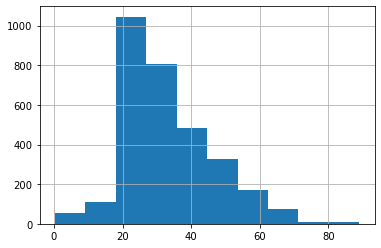

In [37]:
bellevue_df[bellevue_df['profession'] == 'laborer']['age'].hist()

In [28]:
bellevue_df[bellevue_df['profession'] == 'laborer']['disease'].value_counts()

sickness           907
recent emigrant    724
destitution        212
fever               69
insane              52
sore                43
intemperance        22
illegible           19
injuries            16
ulcers              14
ophthalmia          13
typhus              11
rheumatism           7
bronchitis           5
debility             5
blind                5
phthisis             5
lame                 5
diarrhea             4
cripple              4
broken bone          3
dropsy               2
delusion dreams      2
syphilis             2
cut                  1
contusion            1
congested head       1
spinal disease       1
sprain               1
fits                 1
ascites              1
throat cut           1
paralysis            1
phagadaena           1
colic                1
deaf                 1
jaundice             1
vagrant              1
ague                 1
Name: disease, dtype: int64

There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter Pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (9584 x 8 columns).
    * This is very useful!

## Select Columns

Selecting Pandas columns is very similar to the way we access a value in a Python dictionary by putting the key in square brackets.  

> **Dictionary**  
> person1 = {"name": "Mary Gallagher",
             "age": 28,
             "profession": "married"}

> **Key            ->    Value**  
> person1['name'] —> "Mary Gallagher"


To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [22]:
bellevue_df['disease'].count() / bellevue_df['disease']

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [5]:
bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [111]:
type(bellevue_df['disease'])

pandas.core.series.Series

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

In [6]:
bellevue_df[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9579,NaN
9580,lame
9581,NaN
9582,NaN


In [113]:
type(bellevue_df[['disease']])

pandas.core.frame.DataFrame

## Count Values

To count the values in a column, we can use the `.value_counts()` method.

> On Bellevue Almshouse "Diseases
> Some were diagnosed with medically recognizable illnesses, including “fever,” “dropsy” and “neuralgia.” Others were diagnosed with “diseases” that made visible the ways in which immigrants were failing to meet the expectations of urban citizenship. These included “destitution” and “recent emigrant.” Neither of these diagnoses reflected an immigrant’s health. Nevertheless, they were treated as pathologies, and those pathologies governed city officials perceptions of immigrants. Sickness, injuries or destitution were subsumed under the pathology of “recent emigrant.” This diagnosis also determined immigrants’ paths through the New York City public health system.

> -Anelise Shrout, ["(Re)Humanizing Data: Digitally Navigating the Bellevue Almshouse"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)

Count the values in the "disease" column:

In [17]:
bellevue_df['age'].min()

0.08

In [15]:
bellevue_df['age'].mean()

97.0

In [12]:
bellevue_df['age'].mean()

30.33260436333124

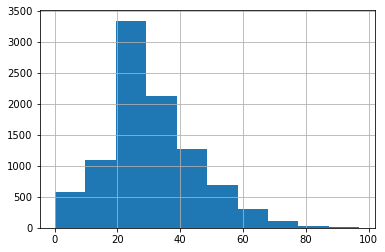

In [23]:
bellevue_df['age'].hist()

In [7]:
bellevue_df['disease'].value_counts()

sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
injuries             31
ulcers               26
ophthalmia           19
vagrant              17
lame                 15
debility             11
rheumatism           11
blind                 9
bronchitis            9
dropsy                8
phthisis              8
old age               7
syphilis              7
erysipelas            6
dysentery             6
diarrhea              6
cripple               5
broken bone           5
measles               3
drunkenness           3
burn                  3
scarletina            2
jaundice              2
scrofula              2
abandonment           2
fits                  2
delusion dreams       2
tuberculosis          2
piles                 2
sprain                2
pneumonia             2
severed limb    

To select the top 10 most frequent values in the "disease" column, we can combine `value_counts()` with regular Python list slicing (for example `[:10]`)

Count the values in the "professions" column:

In [11]:
bellevue_df['profession']

0              married
1              laborer
2              laborer
3              laborer
4                  NaN
             ...      
9579               NaN
9580    superintendent
9581               NaN
9582               NaN
9583          spinster
Name: profession, Length: 9584, dtype: object

## 🛑 Reflection & Group Discussion 🛑

Take a minute to look through the so-called "diseases" and "professions" recorded in the Bellevue Almshouse data, and pick one or two that stand out to you. In the cell below, write a few thoughts in response to the following questions.

- What kind of biases or stereotypes are embedded in this data?
- How do you think this data was used to harm or oppress people (if at all)?
- Imagine if this dataset was created by the Irish immigrants themselves — how do you think it would look different?


*Type your thoughts here (double-click this cell)*

Now discuss and share your thoughts with your group. How does the history of this dataset shape how we should analyze and interpret it? How does this historical dataset relate to more contemporary data?

## Make Plots

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

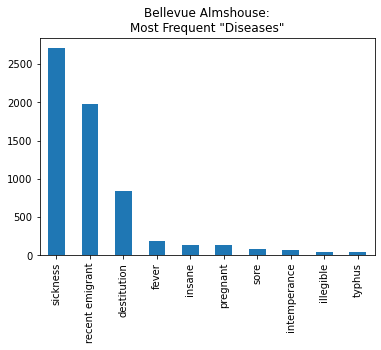

In [35]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter. For example, to make a horizontal bar chart, we can set `kind='barh'`.
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 


Plot the 10 most frequent "professions" with either a `pie` chart or a `barh` plot:

In [ ]:
bellevue_df['disease'].value_counts()[?].plot(kind='?', title='?')

## Save Plots

To save a plot, you can use `.figure.savefig()` and insert a desired filename into the function.

To help prevent labels from being cut off, you can set `bbox_inches = 'tight'` and specify the resolution of the image, or dots per inch (dpi), setting `dpi=200`. For more information, refer to the [Matplotlib documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html), which is the library that Pandas uses for plotting.

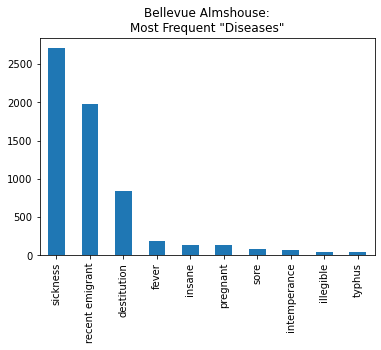

In [21]:
plot = bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')
plot.figure.savefig('disease_bar_chart.png', bbox_inches='tight', dpi=200)